# 비지도학습

- 비지도 변환 (unsupervised transformation) - 차원축소 (dimensionality reduction)
 - 다양한 특성들로 profile되어 있는 샘플 데이터들에서 정보가 많은 특성들로 추려준다. 


- 군집 (clustering) - 구분 <sub>분류 (classification) 와는 다르다.</sub> 
 - 다양한 특성들로 profile되어 있는 샘플 데이터들에서 비슷한 특성 profile을 가지는 샘플들끼리 묶어준다. 


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.metrics import accuracy_score

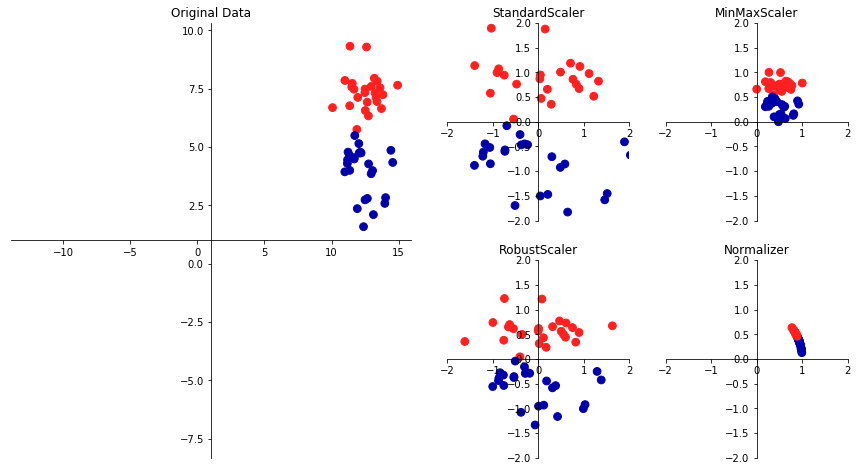

In [5]:
# 전처리 알고리즘들 역시 엄밀히 말하면 비지도 학습에 들어간다. 기존의 데이터가 구분되기 쉽도록 기준을 정해 좍좍 펴준다. ;;
mglearn.plots.plot_scaling()

- Standard scaler : 평균을 0, 분산을 1로 변환시켜버린다. 
- Robust scaler : Standard scaler와 비슷한데 극단값의 영향을 받지 않도록 하였음. 
- MinMax scaler : 모든 특성이 0과 1 사이에 존재하도록 변형 
- Normalizer : 데이터를 반지름이 1인 원에 투영하여 변형 (이렇게 해야하는 특별한 목적이 있을때가 있다고 한다.)

# 주성분 분석 (Principal component analysis, PCA)

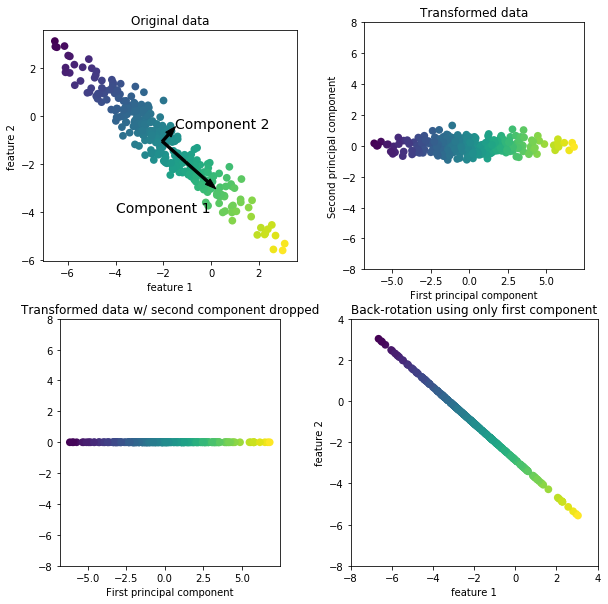

In [10]:
mglearn.plots.plot_pca_illustration()

- 데이터를 우측 하단 처럼 만들어주는 계수세트 1 (first comonent) 
- 데이터의 분산을 설명하는 계수세트들을 만들고 순위를 매겨 1,2번을 나눈다. 
- 마치 전처리 문제처럼 데이터를 변형한다. 

In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [13]:
cancer = load_breast_cancer()

In [15]:
cancer.data.shape

(569, 30)

In [16]:
cancer.target.shape

(569,)

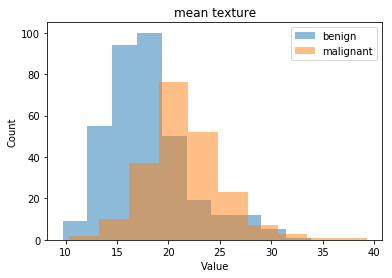

In [32]:
# 일단 데이터의 특성을 잘 모른다고 보고 데이터를 관찰 해보자.
mask_fine = cancer.target == 1
mask_notg = cancer.target == 0 

feature_order = 1
plt.title(cancer.feature_names[feature_order])
plt.hist(cancer.data[:,feature_order][mask_fine],alpha=0.5,label='benign')
plt.hist(cancer.data[:,feature_order][mask_notg],alpha=0.5,label='malignant')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
# PCA를 수행하기 전에 전처리를 하는 것이 좋다. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [34]:
# 양성이냐 음성이냐 정답지 없이, 분산만을 가지고 분석한다. 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

In [35]:
X_scaled.shape

(569, 30)

In [37]:
X_pca.shape

(569, 2)

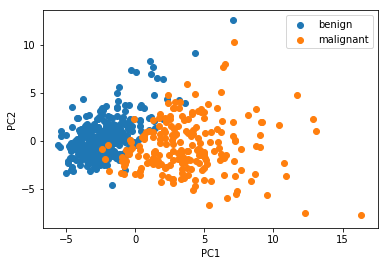

In [44]:
# 주성분 값으로 scatter plot을 그려보면 정답지에 비교해보았을때 명백히 나뉘어 질수 있도록 해준다. 
plt.scatter(X_pca[mask_fine][:,0],X_pca[mask_fine][:,1],label='benign')
plt.scatter(X_pca[mask_notg][:,0],X_pca[mask_notg][:,1],label='malignant')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [47]:
# 주성분이라는 것은 특성(feature)들의 계수 집합에 의한 결과값이다. 
print pca.components_.shape
print pca.components_

(2, 30)
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [46]:
X_scaled.shape

(569, 30)

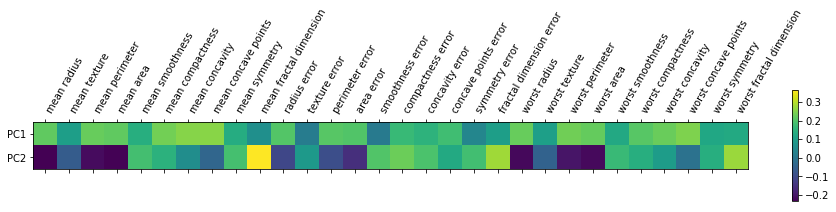

In [53]:
plt.matshow(pca.components_)
plt.yticks([0,1],['PC1','PC2'])
plt.xticks(range(0,30),cancer.feature_names,rotation=60,ha='left')
plt.colorbar()
plt.show()

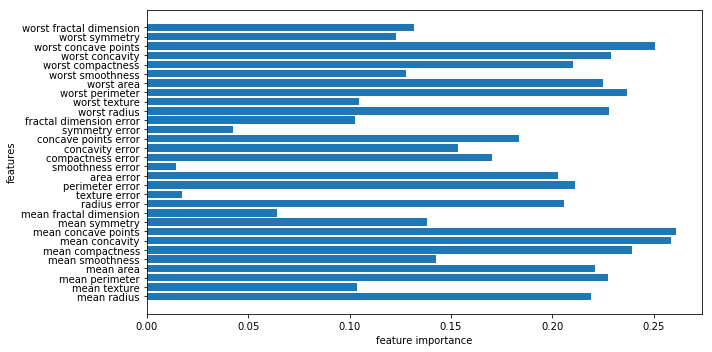

In [57]:
plt.figure(figsize=(10,5))
n_features = cancer.data.shape[1]
plt.barh(range(n_features),pca.components_[0,:],align='center')
plt.yticks(range(n_features),cancer['feature_names'])
plt.xlabel('feature importance')
plt.ylabel('features')
plt.tight_layout()
plt.show()

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [4]:
people.DESCR

'LFW faces dataset'

In [5]:
people.images[0].shape # 한사람의 이미지 크기 

(87, 65)

In [14]:
87 * 65

5655

In [13]:
people.data[0].shape

(5655,)

In [15]:
people.images.shape

(2769, 87, 65)

In [16]:
people.target_names.shape

(53,)

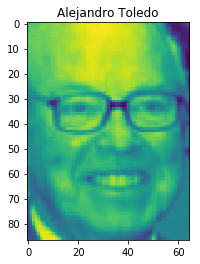

In [6]:
plt.imshow(people.images[0])
plt.title(people.target_names[0])

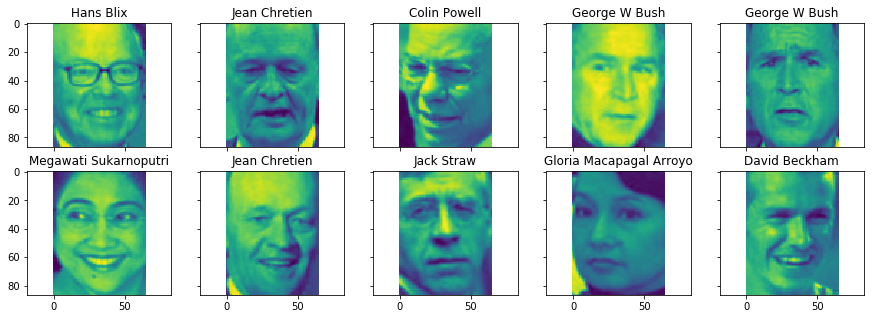

In [17]:
fig,axes = plt.subplots(2,5,figsize=(15,5),sharex=True,sharey=True)

for image,target,ax in zip(people.images, people.target, np.ravel(axes)):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [22]:
people.images.shape # (87,65) 사이즈의 사진들 

(2769, 87, 65)

In [23]:
people.target.shape # 2769 장의

(2769,)

In [24]:
len(set(people.target)) # 총 53명의

53

In [27]:
np.bincount(people.target)

array([ 39,  35,  21,  36,  77,  42,  24,  29,  21, 236,  31, 121,  22,
       530, 109,  44,  26,  22,  39,  71,  20,  28,  52,  55,  21,  42,
        21,  24,  20,  53,  31,  28,  60,  32,  41,  22,  41,  48,  33,
        20,  22,  22,  27,  26,  23,  52,  23,  25,  33, 144,  32,  49,  24])

In [28]:
people.target.shape

(2769,)

In [20]:
mask = np.zeros(people.target.shape,dtype=bool)

In [21]:
for i in set(people.target):
    mask[np.where(people.target == i)[0][:50]] = 1

In [22]:
X = people.data[mask] / 255 
Y = people.target[mask]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

In [27]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
knn.score(x_test,y_test) # 정확도 별로임 

0.24724061810154527

In [29]:
# 그렇다면 미리 PCA로 특성선별을 해보자. 
from sklearn.decomposition import PCA 

In [30]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(x_train)

X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

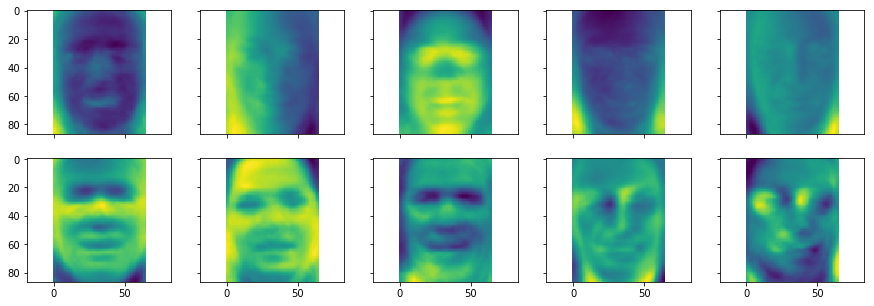

In [31]:
fig,axes = plt.subplots(2,5,figsize=(15,5),sharex=True,sharey=True)
for comp, ax in zip(pca.components_,np.ravel(axes)):
    ax.imshow(comp.reshape(people.images[0].shape))

In [79]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [80]:
knn.score(X_test_pca,y_test) # PC값을 통한 훈련으로 점수가 올랏다! 

0.36203090507726271

In [83]:
X_train_pca[0].shape, pca.components_.shape

((100,), (100, 5655))

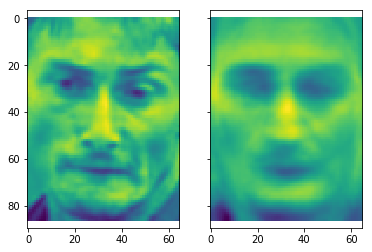

In [36]:
# PC값이 많아질수록 재구성이 잘되는것을 확인해보자. 
pca         = PCA(n_components=50,whiten=True,random_state=0).fit(x_train)
X_train_pca = pca.transform(x_train)
X_test_pca  = pca.transform(x_test)
recon       = pca.inverse_transform(X_train_pca)[1].reshape(people.images[0].shape)
fig, ax     = plt.subplots(1,2,sharex=True,sharey=True)
ax[0].imshow(x_train[1].reshape(people.images[0].shape))
ax[1].imshow(recon)

In [37]:
from sklearn.datasets import load_digits

In [38]:
digits = load_digits()

In [40]:
print (digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

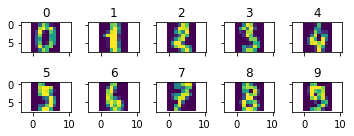

In [46]:
fig, axes = plt.subplots(2,5,figsize=(5,2),sharex=True,sharey=True)

for image,label,ax in zip(digits.images,digits.target,np.ravel(axes)):
    ax.imshow(image)
    ax.set_title(label)
plt.tight_layout()
plt.show()

In [47]:
from collections import Counter

In [48]:
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [49]:
pca = PCA(n_components=2)
pca.fit(digits.data)
x_pca = pca.transform(digits.data)


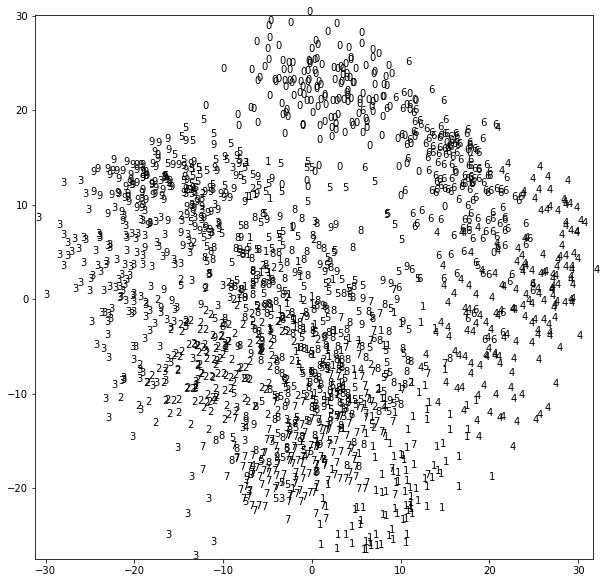

In [64]:
plt.figure(figsize=(10,10))
plt.xlim(x_pca[:,0].min(),x_pca[:,0].max())
plt.ylim(x_pca[:,1].min(),x_pca[:,1].max())
for i,n in enumerate(digits.target):
    x = x_pca[i,0]
    y = x_pca[i,1]
    plt.text(x,y,n)
plt.show()
    

**manifold**

위상수학과 기하학에서, 다양체(多樣體, 영어: manifold 매니폴드[*])는 국소적으로 유클리드 공간과 닮은 위상 공간이다. 즉, 국소적으로는 유클리드 공간과 구별할 수 없으나, 대역적으로 독특한 위상수학적 구조를 가질 수 있다.https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%96%91%EC%B2%B4

뭔소리죠? 

여러 features로 표현된 우리 샘플들 간의 "거리"를 단순히 계산하면 틀리 수 도 있으니, 수학적으로 잘 펴서 계산하는게 좋을거다. 
그런 수학은 수학자들이 공부해서 만들어 놨으니 갖다 쓰자. 

![](http://cfs4.tistory.com/upload_control/download.blog?fhandle=YmxvZzEwNjMwMUBmczQudGlzdG9yeS5jb206L2F0dGFjaC8wLzEwMDAwMDAwMDAwMy5qcGc%3D)
http://markov.tistory.com/39

In [66]:
# manifold 학습. 
# sample간의 거리를 측정할때 
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)

In [67]:
x_tsne = tsne.fit_transform(digits.data)

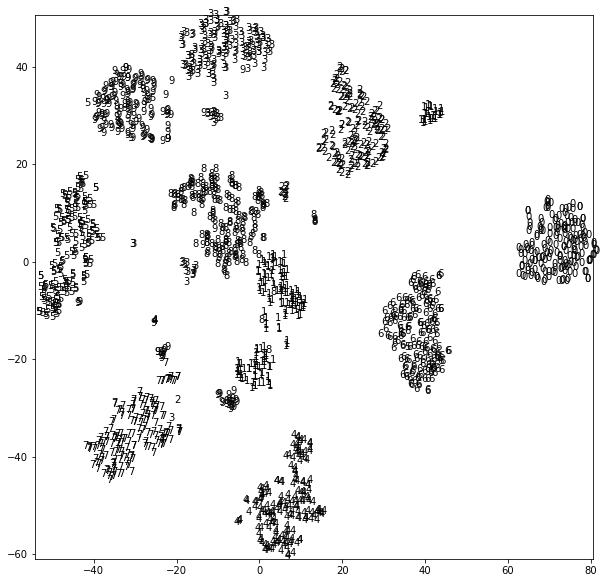

In [68]:
plt.figure(figsize=(10,10))
plt.xlim(x_tsne[:,0].min(),x_tsne[:,0].max())
plt.ylim(x_tsne[:,1].min(),x_tsne[:,1].max())
for i,n in enumerate(digits.target):
    x = x_tsne[i,0]
    y = x_tsne[i,1]
    plt.text(x,y,n)
plt.show()

In [69]:
tsne.method

'barnes_hut'

## 군집 (Clustering)
* 비슷한 샘플끼리 모아준다. 
* 샘플들이 특성(feature)에 따라서 어떤 그룹으로 나누어진다면, 샘플을 이해하는데 도움이 될것이다. 

### K-means clustering
* 몇개의 그룹인지 미리 지정해줘야하는 단점!!!!!!! k 값을 지정해줘야한다. 

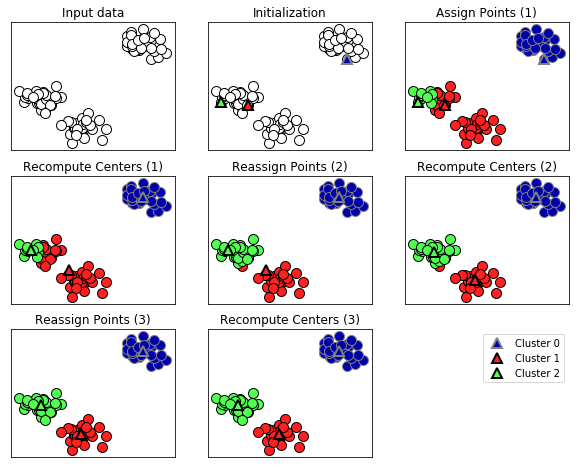

In [70]:
mglearn.plots.plot_kmeans_algorithm()

In [129]:
# 클러스터 모양이 원이 아닐 경우에는 역할을 잘 못한다. 
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans

In [107]:
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

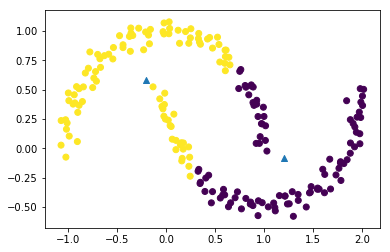

0.755


In [113]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plt.scatter(X[:,0],X[:,1],c=kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^')
plt.show()
print accuracy_score(kmeans.predict(X),abs(y-1))

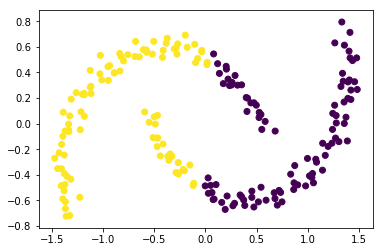

0.755


In [109]:
# pca 변환을 해주면 어떨까 
pca = PCA()
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
plt.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.predict(X_pca))
plt.show()
print accuracy_score(kmeans.predict(X_pca),y)

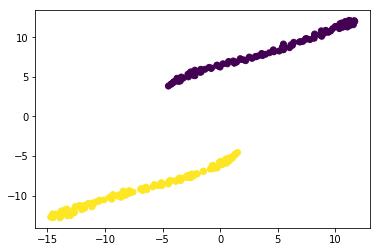

1.0


In [118]:
# 마니폴드 변환을 해주면 어떨까 
tnse = TSNE(random_state=0)
X_tnse = tnse.fit_transform(X)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_tnse)
plt.scatter(X_tnse[:,0],X_tnse[:,1],c=kmeans.predict(X_tnse))
plt.show()
print accuracy_score(kmeans.predict(X_tnse),abs(y-1))

### 병합군집 (aggromerative clustering) 
* 모든 포인트에서 시작해서 뭉쳐나가는 알고리즘. 역시 최종 군집 갯수를 지정해야함. 

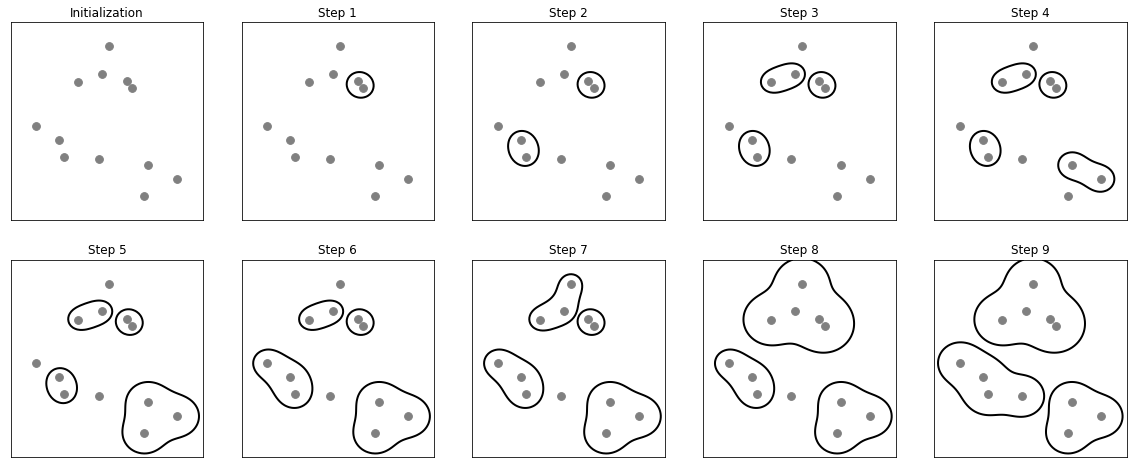

In [120]:
mglearn.plots.plot_agglomerative_algorithm()

In [121]:
from sklearn.cluster import AgglomerativeClustering

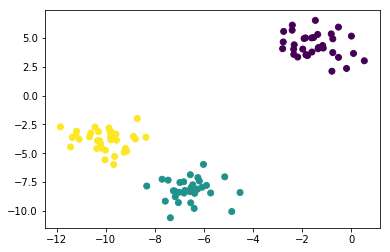

In [135]:
agc = AgglomerativeClustering(n_clusters=3)
X,y = make_blobs(random_state=1)
plt.scatter(X[:,0],X[:,1],c=agc.fit_predict(X))
plt.show()

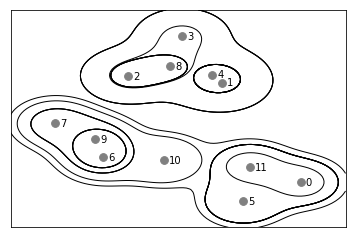

In [134]:
# 계층적 군집
mglearn.plots.plot_agglomerative()

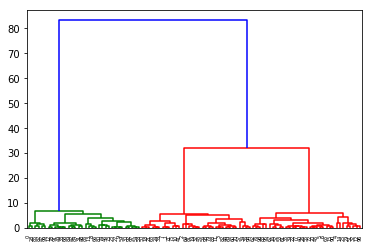

In [153]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage_array = ward(X)
Z = dendrogram(linkage_array)
plt.show()

(-0.5, 1.5, -0.5, 99.5)

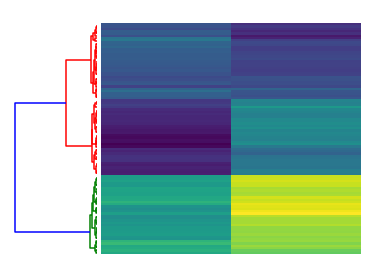

In [151]:
from scipy.cluster.hierarchy import dendrogram, ward
fig = plt.figure()
axdendro = fig.add_axes([0.09,0.1,0.2,0.8])
linkage_array = ward(X)
axdendro.axis('off')
Z = dendrogram(linkage_array,orientation='left')
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
Zix = Z['leaves']
axmatrix.matshow(X[Zix],aspect='auto', origin='lower')
axmatrix.axis('off')

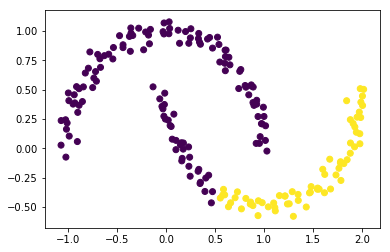

In [132]:
agc = AgglomerativeClustering(n_clusters=2)
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1],c=agc.fit_predict(X))
plt.show()

In [1]:
from sklearn.datasets import load_digits

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
from scipy.cluster.hierarchy import dendrogram, ward

In [3]:
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [8]:
Counter(digits.target)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [37]:
X = digits.data
y = digits.target

y = y.reshape(1,-1)

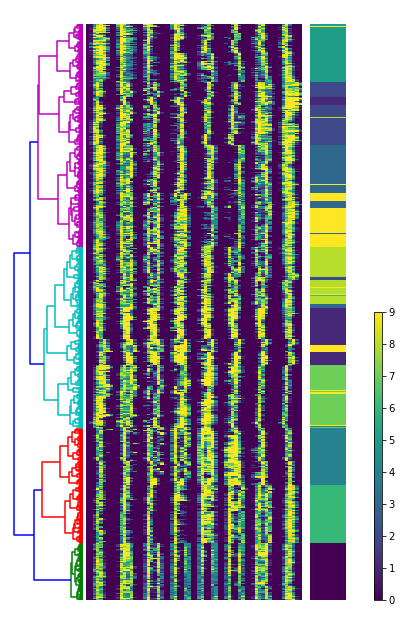

In [40]:
from scipy.cluster.hierarchy import dendrogram, ward
fig      = plt.figure(figsize=(5,10))
axdendro = fig.add_axes([0.09,0.1,0.2,0.8]) #  [left, bottom, width, height]
linkage_array = ward(X)
axdendro.axis('off')
Z = dendrogram(linkage_array,orientation='left')
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
Zix = Z['leaves']
axmatrix.matshow(X[Zix],aspect='auto', origin='lower')
axmatrix.axis('off')
axans = fig.add_axes([0.92,0.1,0.1,0.8])
im = axans.matshow(y.T[Zix],aspect='auto', origin='lower')
axans.axis('off')
axcolor = fig.add_axes([1.1,0.1,0.02,0.4])
plt.colorbar(im, cax=axcolor)
plt.show()

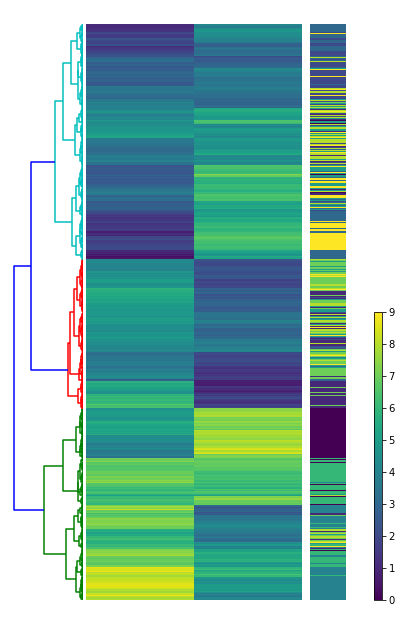

In [48]:
X = digits.data
y = digits.target

y = y.reshape(1,-1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

from scipy.cluster.hierarchy import dendrogram, ward
X = X_pca
fig = plt.figure(figsize=(5,10))
axdendro = fig.add_axes([0.09,0.1,0.2,0.8]) #  [left, bottom, width, height]
linkage_array = ward(X)
axdendro.axis('off')
Z = dendrogram(linkage_array,orientation='left')
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
Zix = Z['leaves']
axmatrix.matshow(X[Zix],aspect='auto', origin='lower')
axmatrix.axis('off')
axans = fig.add_axes([0.92,0.1,0.1,0.8])
im = axans.matshow(y.T[Zix],aspect='auto', origin='lower')
axans.axis('off')
axcolor = fig.add_axes([1.1,0.1,0.02,0.4])
plt.colorbar(im, cax=axcolor)
plt.show()

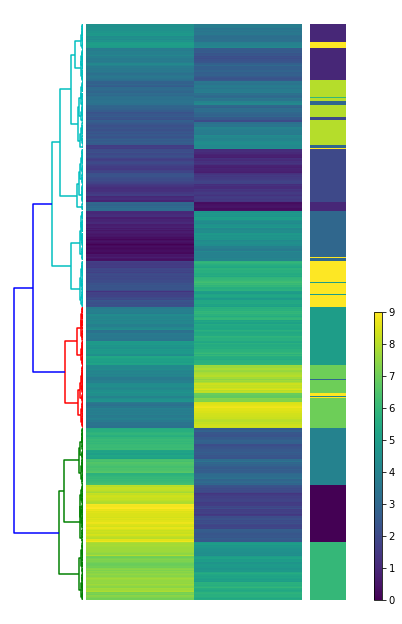

In [45]:
X = digits.data
y = digits.target

y = y.reshape(1,-1)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

from scipy.cluster.hierarchy import dendrogram, ward
X = X_tsne
fig = plt.figure(figsize=(5,10))
axdendro = fig.add_axes([0.09,0.1,0.2,0.8]) #  [left, bottom, width, height]
linkage_array = ward(X)
axdendro.axis('off')
Z = dendrogram(linkage_array,orientation='left')
axmatrix = fig.add_axes([0.3,0.1,0.6,0.8])
Zix = Z['leaves']
axmatrix.matshow(X[Zix],aspect='auto', origin='lower')
axmatrix.axis('off')
axans = fig.add_axes([0.92,0.1,0.1,0.8])
im = axans.matshow(y.T[Zix],aspect='auto', origin='lower')
axans.axis('off')
axcolor = fig.add_axes([1.1,0.1,0.02,0.4])
plt.colorbar(im, cax=axcolor)
plt.show()

![](./file_ml/rnaseq.PNG)

### summary

* 비지도 학습은 데이터를 변형(transformation), 구분(clustering)한다.
* 적절한 데이터 변형을 통해 구분하면 label이 없어도 실제 label과 유사한 분류를 할 수 있다. 
* 각 특성이 얼마나 샘플을 대표할 수 있는지에 따라서 각 특성이 분류를 방해할 수도 있고 중첩적으로 기여할 수도 있다. 
* PCA 데이터 변형은 이러한 특성들에 대한 가중치를 부여하고 새로운 값을 만들어내기 때문에 효과적인 구분이 가능하다.
* manifold 데이터 변형은 특성들이 구성하는 공간을 재구성하고 각 샘플들의 거리를 보존하는 2차원 표현을 생성하기 때문에 매우 놀라운 성능을 보이지만, PCA와 같이 계수를 돌려주지 못하기 때문에 새로운 데이터가 들어오면 새로운데이터를 포함하여 전체 분석을 새로 해야하는 문제가 있다. 주로 주어진 데이터를 탐색해볼때 사용한다. 
* 이러한 비지도 학습들은 진리를 잘 알지 못하는 생물정보를 시각적으로 구분하고 관찰할 때 사용한다. 